<a href="https://colab.research.google.com/github/Saifullah785/python-data-science-handbook-notes/blob/main/03_09_Pivot_Tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pivot Tables**

### **Motivating Pivot Tables**

In [1]:
# Import necessary libraries: numpy for numerical operations, pandas for data manipulation, and seaborn for data visualization.
import numpy as np
import pandas as pd
import seaborn as sns

# Load the 'titanic' dataset from seaborn.
titanic = sns.load_dataset('titanic')

In [ ]:
# Display the first 5 rows of the titanic DataFrame to get a preview of the data.
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#**Pivot Tables by Hand**

In [ ]:
# Group the titanic DataFrame by 'sex' and calculate the mean of the 'survived' column for each sex.
# This shows the survival rate for males and females.
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# Group the titanic DataFrame by 'sex' and 'class', calculate the mean of 'survived',
# and then unstack the result to create a pivot-table-like structure showing survival rates by sex and class.
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

/tmp/ipython-input-18-87816545.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#**Pivot Table Syntax**

In [ ]:
# Create a pivot table to show the survival rate ('survived') based on 'sex' (index) and 'class' (columns).
# The aggregation function used is 'mean'.
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')
#

/tmp/ipython-input-19-999901500.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#**Multilevel Pivot Tables**

In [ ]:
# Create a new categorical variable 'age' by cutting the 'age' column into bins [0, 18] and [18, 80].
age = pd.cut(titanic['age'], [0, 18, 80])
# Create a pivot table showing survival rate based on 'sex' and the new 'age' categories (multilevel index),
# and 'class' (columns).
titanic.pivot_table('survived', ['sex', age], 'class')

/tmp/ipython-input-20-1612114883.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
# Create a new categorical variable 'fare' by quantiling the 'fare' column into 2 bins.
fare = pd.qcut(titanic['fare'], 2)
# Create a pivot table showing survival rate based on 'sex' and 'age' categories (multilevel index),
# and 'fare' quantiles and 'class' (multilevel columns).
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])
#

/tmp/ipython-input-21-3623671454.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#**Additional Pivot Table Options**

# call signature as of Pandas 1.3.5
DataFrame.pivot_table(
                      data,
                      
                      values=None, index=None,
                      
                      columns=None,
                      
                      aggfunc='mean',
                      
                      fill_value=None,
                      
                      margins=False,
                      
                      dropna=True,
                      
                      margins_name='All',
                      
                      observed=False,
                      
                      sort=True)

In [ ]:
# Create a pivot table with 'sex' as the index and 'class' as the columns.
# Use different aggregation functions for 'survived' (sum) and 'fare' (mean).
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

/tmp/ipython-input-22-3754606236.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index='sex', columns='class',
/tmp/ipython-input-22-3754606236.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanic.pivot_table(index='sex', columns='class',


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
# Create a pivot table showing the survival rate based on 'sex' and 'class'.
# Include margins=True to add row and column sums (labeled 'All') showing overall survival rates.
titanic.pivot_table('survived', index='sex', columns='class',
                    margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#**Example: Birthrate Data**

In [2]:
# Read the births data from a CSV file hosted on GitHub into a pandas DataFrame.
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [3]:
# Display the first 5 rows of the births DataFrame to get a preview of the data.
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
# Add a 'decade' column by taking the floor division of the 'year' by 10 and multiplying by 10.
births['decade'] = 10 * (births['year'] // 10)
# Create a pivot table showing the total number of births ('births') based on 'decade' (index) and 'gender' (columns).
# The aggregation function used is 'sum'.
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

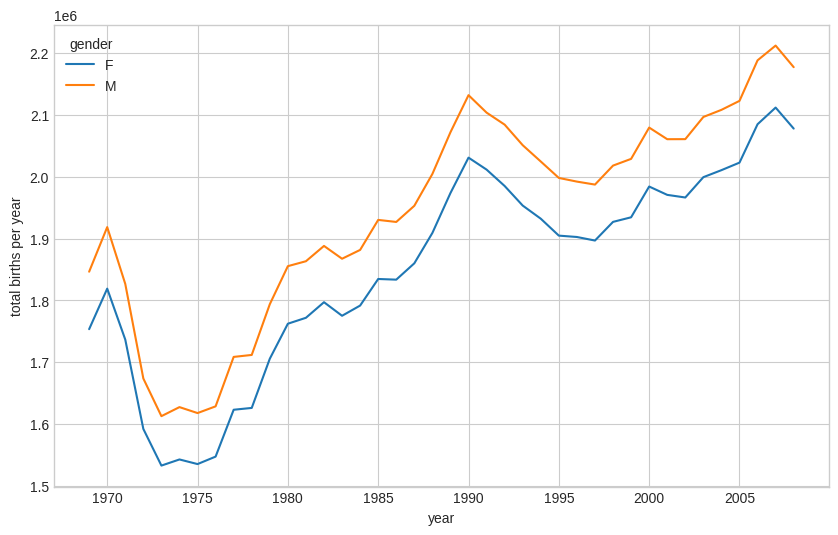

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size and style for the plot.
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8-whitegrid')

# Create a pivot table showing the total births per year for each gender and plot the result as a line chart.
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

In [8]:
# Calculate the 25th, 50th, and 75th percentiles of the 'births' column to identify potential outliers.
quartiles = np.percentile(births['births'], [25, 50, 75])
# Calculate the median (mu) from the quartiles.
mu = quartiles[1]
# Calculate a robust estimate of the standard deviation (sig) using the interquartile range.
sig = 0.74 * (quartiles[2] - quartiles[0])

In [11]:
# Filter the DataFrame to remove outliers in the 'births' column.
# Keep rows where 'births' is within 5 standard deviations of the median.
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [12]:
# Convert the 'day' column to integer type.
births['day'] = births['day'].astype(int)

/tmp/ipython-input-12-1457415740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [13]:
# Create a DatetimeIndex from the year, month, and day columns.
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
# Add a 'dayofweek' column containing the day of the week (Monday=0, Sunday=6).
births['dayofweek'] = births.index.dayofweek

/tmp/ipython-input-13-2314259700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


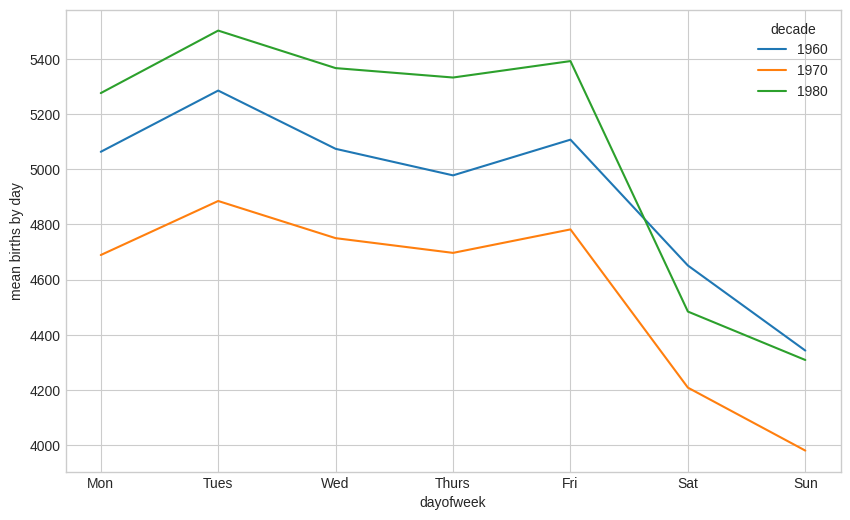

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Create a pivot table showing the mean number of births by day of the week for each decade.
# Then, plot the results as line charts.
births.pivot_table('births', index='dayofweek',
                   columns= 'decade', aggfunc='mean').plot()

# Set the x-axis ticks to represent the days of the week and label them accordingly.
plt.gca().set(xticks=range(7), xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
# Set the y-axis label.
plt.ylabel('mean births by day');

In [15]:
# Create a pivot table showing the average number of births for each month and day combination across all years.
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
# Display the first 5 rows of the resulting pivot table.
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [16]:
from datetime import datetime
# Create a new DatetimeIndex for the births_by_date pivot table,
# using the month and day from the original index and setting the year to 2012 (an arbitrary leap year)
# to allow for plotting annual trends.
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

# Display the first 5 rows of the updated pivot table with the new DatetimeIndex.
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


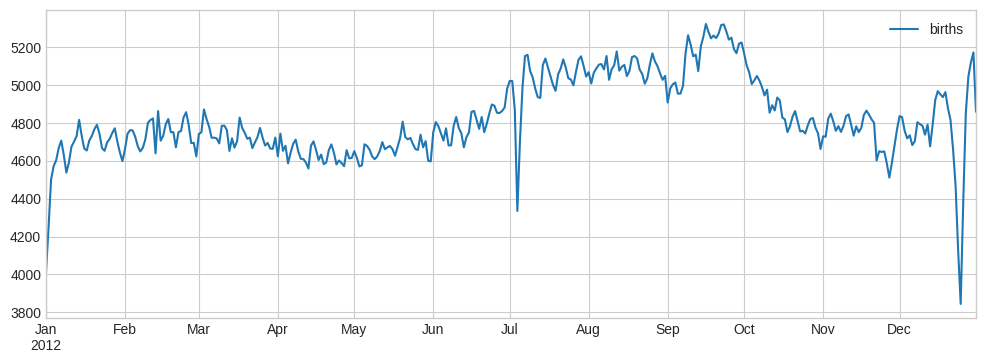

In [17]:
# Create a figure and axes for the plot with a specified size.
fig, ax = plt.subplots(figsize=(12, 4))
# Plot the average number of births by date.
births_by_date.plot(ax=ax);